In [19]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Embedding, GRU, SimpleRNN

In [2]:
vocabulary = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocabulary)

In [3]:
sequence_length = 200
x_train_padded = pad_sequences(x_train, maxlen=sequence_length)
x_test_padded = pad_sequences(x_test, maxlen=sequence_length)

In [4]:
lstm_model = Sequential([
    Embedding(input_dim=vocabulary, output_dim=128, input_length=sequence_length),
    LSTM(128),
    Dense(1, activation='sigmoid')])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
gru_model = Sequential([
    Embedding(input_dim=vocabulary, output_dim=128, input_length=sequence_length),
    GRU(128),
    Dense(1, activation='sigmoid')])
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
rnn_model = Sequential([
    Embedding(input_dim=vocabulary, output_dim=128, input_length=sequence_length),
    SimpleRNN(128),
    Dense(1, activation='sigmoid')])
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
lstm_history = lstm_model.fit(x_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 71s 224ms/step - loss: 0.4237 - accuracy: 0.8010 - val_loss: 0.3430 - val_accuracy: 0.8630
Epoch 2/5
313/313 [==============================] - 73s 233ms/step - loss: 0.2505 - accuracy: 0.9029 - val_loss: 0.3460 - val_accuracy: 0.8484
Epoch 3/5
313/313 [==============================] - 73s 234ms/step - loss: 0.1783 - accuracy: 0.9327 - val_loss: 0.3411 - val_accuracy: 0.8594
Epoch 4/5
313/313 [==============================] - 73s 232ms/step - loss: 0.1278 - accuracy: 0.9551 - val_loss: 0.4311 - val_accuracy: 0.8702
Epoch 5/5
313/313 [==============================] - 73s 233ms/step - loss: 0.0981 - accuracy: 0.9661 - val_loss: 0.4393 - val_accuracy: 0.8576


In [9]:
gru_history = gru_model.fit(x_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 55s 172ms/step - loss: 0.4804 - accuracy: 0.7537 - val_loss: 0.3748 - val_accuracy: 0.8530
Epoch 2/5
313/313 [==============================] - 53s 170ms/step - loss: 0.2701 - accuracy: 0.8918 - val_loss: 0.3187 - val_accuracy: 0.8738
Epoch 3/5
313/313 [==============================] - 53s 169ms/step - loss: 0.1815 - accuracy: 0.9327 - val_loss: 0.3665 - val_accuracy: 0.8678
Epoch 4/5
313/313 [==============================] - 55s 175ms/step - loss: 0.1139 - accuracy: 0.9614 - val_loss: 0.3698 - val_accuracy: 0.8746
Epoch 5/5
313/313 [==============================] - 54s 173ms/step - loss: 0.0717 - accuracy: 0.9761 - val_loss: 0.4140 - val_accuracy: 0.8712


In [10]:
rnn_history = rnn_model.fit(x_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 15s 47ms/step - loss: 0.6527 - accuracy: 0.5950 - val_loss: 0.6651 - val_accuracy: 0.5968
Epoch 2/5
313/313 [==============================] - 14s 45ms/step - loss: 0.5799 - accuracy: 0.6950 - val_loss: 0.7616 - val_accuracy: 0.5578
Epoch 3/5
313/313 [==============================] - 14s 45ms/step - loss: 0.5097 - accuracy: 0.7509 - val_loss: 0.5823 - val_accuracy: 0.7076
Epoch 4/5
313/313 [==============================] - 15s 47ms/step - loss: 0.4344 - accuracy: 0.8067 - val_loss: 0.5515 - val_accuracy: 0.7420
Epoch 5/5
313/313 [==============================] - 15s 47ms/step - loss: 0.3791 - accuracy: 0.8378 - val_loss: 0.5459 - val_accuracy: 0.7372


In [18]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test_padded, y_test)
gru_loss, gru_accuracy = gru_model.evaluate(x_test_padded, y_test)
rnn_loss, rnn_accuracy = rnn_model.evaluate(x_test_padded, y_test)

782/782 [==============================] - 9s 12ms/step - loss: 0.5346 - accuracy: 0.7400


In [17]:
r = lambda x: round(x, 2)
data = [
    ["Accuracy", r(rnn_accuracy), r(lstm_accuracy), r(gru_accuracy)],
    ["Loss", r(rnn_loss), r(lstm_loss), r(gru_loss)],
]

headers = ["Metric", "RNN", "LSTM", "GRU"]
print(tabulate(data, headers=headers, tablefmt="pretty"))

+----------+------+------+------+
|  Metric  | RNN  | LSTM | GRU  |
+----------+------+------+------+
| Accuracy | 0.74 | 0.85 | 0.86 |
|   Loss   | 0.53 | 0.46 | 0.44 |
+----------+------+------+------+


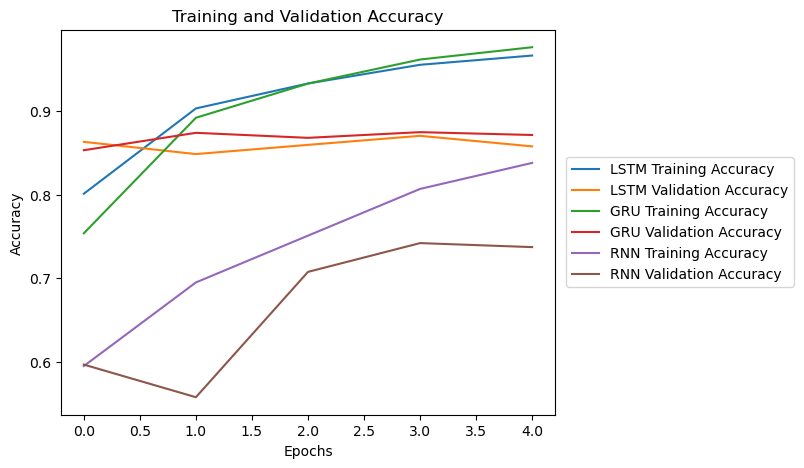

In [20]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy ')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy ')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy ')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

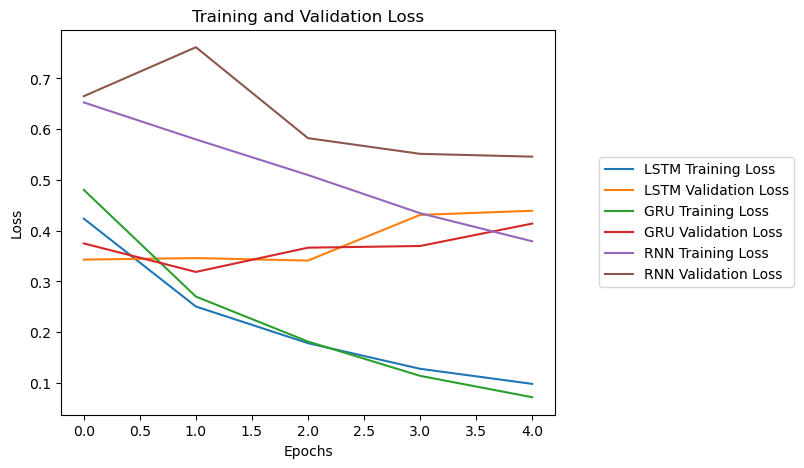

In [21]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss ')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss ')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.plot(rnn_history.history['loss'], label='RNN Training Loss ')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))